In this notebook, we will break down the **core components of LlamaIndex** and understand their functionalities step by step. These components include:  

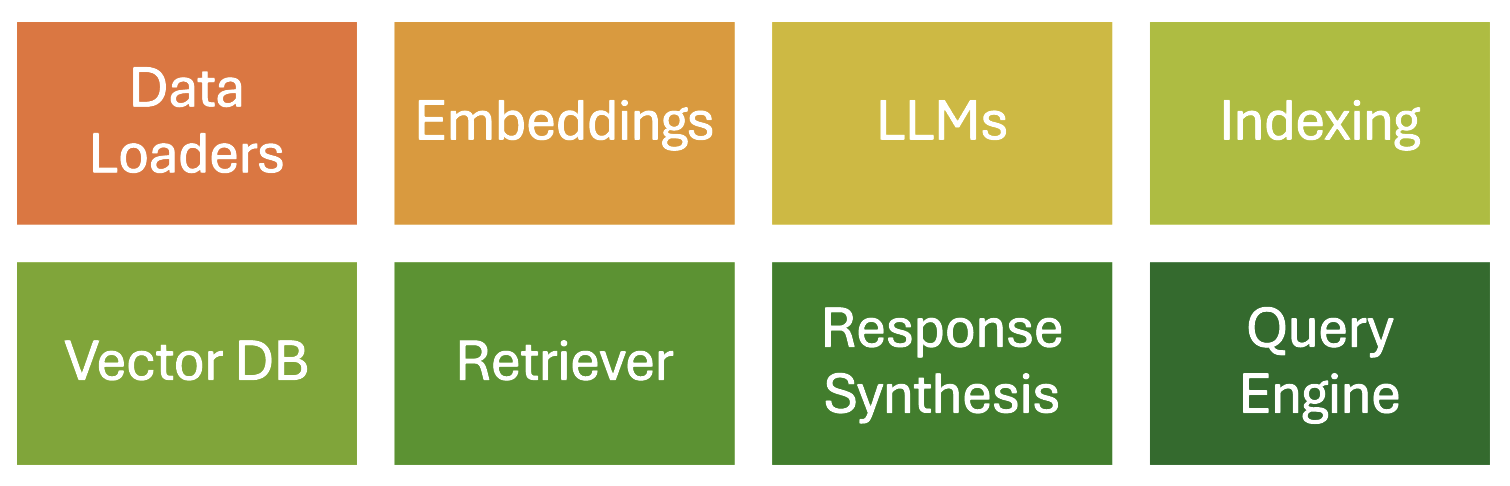

- **Data Loaders**: Import data from various sources  
- **Embeddings**: Generate vector representations of text  
- **LLMs**: Utilize language models for reasoning  
- **Indexing**: Organize data efficiently  
- **Vector Databases**: Store and retrieve vectorized data  
- **Retrievers**: Fetch relevant information from indexes  
- **Response Synthesis**: Generate informative answers  
- **Query Engine**: Execute structured queries  

Each section will cover **practical code examples** to solidify your understanding.  


# Components of LlamaIndex

## 1. Data Loaders
- Loading PDF Files  
- Loading CSV Files  
- Loading Web Page  
- Reading From a Directory  

## 2. Embeddings
- OpenAI Embeddings  
- Open Source Embeddings From Huggingface  
- Loading SOTA Embedding Model  

## 3. LLMs
- OpenAI  

## 4. Indexing
- Vector Store Index  
- Summary Index  
- Keyword Table Index  
- Document Summary Index  

## 5. Vector DB
- Save Index to Local Disk  
- Using ChromaDB  
- Using Pinecone  

## 6. Retriever
- Vector Store Index Retriever  
- Summary Index Retriever  
- Keyword Table Index Retriever  
- Document Summary Index Retriever  

## 7. Response Synthesis
- Refine  
- Compact  
- Tree Summarize  
- Accumulate  
- Compact Accumulate  

## 8. Query Engine  

The first step in using LlamaIndex is **loading data from various sources**. Data loaders help us **ingest information from PDFs, CSVs, web pages, and directories**, allowing us to structure it for further processing.  


Let's dive into **Data Loaders**!

## Data Loaders

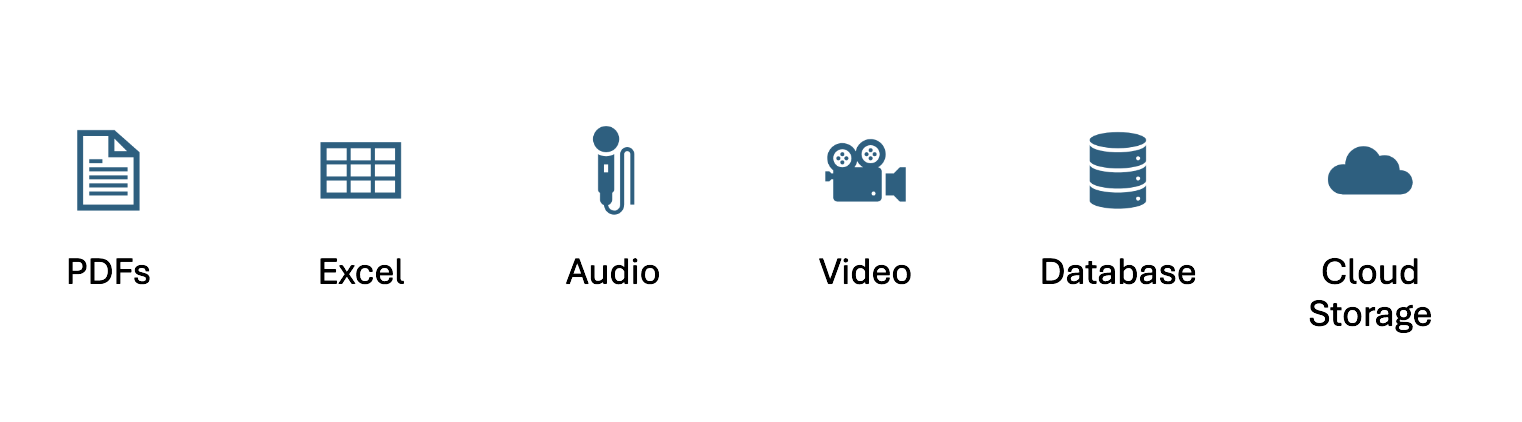

### Loading PDF Files  
LlamaIndex allows you to extract text from **PDF documents**, making it easy to process large reports, research papers, and scanned documents. It typically uses **PyMuPDF (fitz), pdfminer, or pdfplumber** as backend libraries for text extraction.  


In [9]:
!mkdir data
!wget 'https://raw.githubusercontent.com/aravindpai/Speech-Recognition/1882379d3152c8cd830d74e677be4dd161d024ea/transformers.pdf' -O 'data/transformers.pdf'

--2025-03-25 01:06:21--  https://raw.githubusercontent.com/aravindpai/Speech-Recognition/1882379d3152c8cd830d74e677be4dd161d024ea/transformers.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/octet-stream]
Saving to: ‘data/transformers.pdf’

data/transformers.p 100%[===================>]   2.11M  --.-KB/s    in 0.03s   

2025-03-25 01:06:21 (72.0 MB/s) - ‘data/transformers.pdf’ saved [2215244/2215244]



In [36]:
%%capture
!pip install llama-index

In [13]:
from pathlib import Path
from llama_index.readers.file import PDFReader

In [14]:
loader = PDFReader()

In [15]:
documents = loader.load_data(file=Path('/content/data/transformers.pdf'))

In [16]:
len(documents)

15

In [37]:
%%capture
documents[0].text

### Loading CSV Files  
Many datasets are stored in **CSV (Comma-Separated Values) format**. LlamaIndex enables easy **tabular data ingestion**, allowing you to load structured data and process it efficiently.  


In [18]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv -O 'data/transactions.csv'

--2025-03-25 01:08:13--  https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.0, 16.12.36.15, 52.219.160.179, ...
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 869537 (849K) [text/csv]
Saving to: ‘data/transactions.csv’

data/transactions.c 100%[===================>] 849.16K  1.02MB/s    in 0.8s    

2025-03-25 01:08:15 (1.02 MB/s) - ‘data/transactions.csv’ saved [869537/869537]



In [19]:
from llama_index.readers.file import CSVReader

In [20]:
loader = CSVReader()

In [21]:
documents = loader.load_data(file=Path('/content/data/transactions.csv'))

In [22]:
%%capture
print(documents[0].text)

### Loading Web Pages  
If you need to **scrape data from the web**, LlamaIndex provides a web page loader that fetches **HTML content** and extracts meaningful text from articles, blogs, or documentation. This can be useful for **knowledge-based applications**.  


In [24]:
%%capture
!pip install llama-index-readers-web

In [28]:
%%capture
!pip install unstructured

In [29]:
from llama_index.readers.web import UnstructuredURLLoader

In [30]:
loader = UnstructuredURLLoader(urls=['https://huggingface.co/blog/moe'])

In [31]:
documents = loader.load_data()

In [32]:
%%capture
print(documents[0].text)

In [33]:
from llama_index.core import Document

In [34]:
document = Document(text="\n\n".join([doc.text for doc in documents]))

In [35]:
with open('data/blog.html', 'w') as file:
  file.write(document.text)

### Reading from a Directory  

When working with **multiple files** stored in a directory (such as PDFs, text files, or JSON files), LlamaIndex provides a directory loader that helps batch-load these files efficiently into a single **document store**.  


In [38]:
from llama_index.core import SimpleDirectoryReader

In [39]:
documents = SimpleDirectoryReader('/content/data').load_data()

or you can load data using file names:

In [40]:
documents = SimpleDirectoryReader(input_files=[
                                        "/content/data/transactions.csv",
                                        "/content/data/transformers.pdf"]
                                   ).load_data()

In [41]:
%%capture
print(documents[4].text)

Now that we've covered how to **load data into LlamaIndex**, the next step is to **convert this text into vector embeddings** so that it can be processed effectively by a retrieval system. Let's move on to **Embeddings**!  


## Embeddings

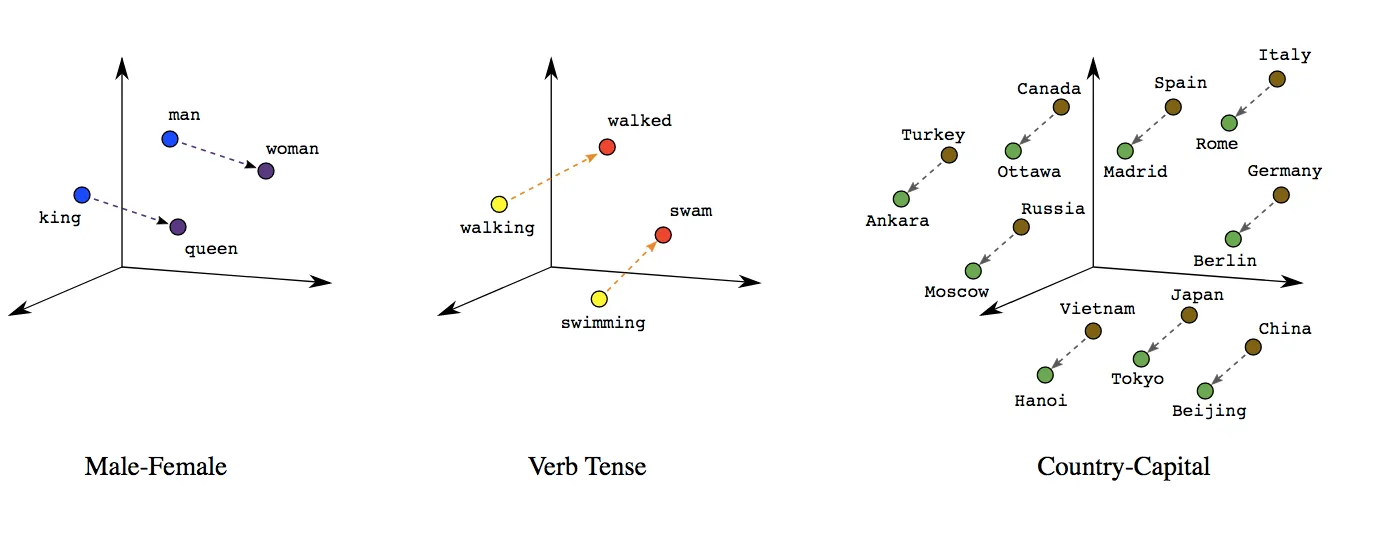

[Source](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*SYiW1MUZul1NvL1kc1RxwQ.png)


### OpenAI Embeddings  

LlamaIndex supports **OpenAI’s embedding models** (such as `text-embedding-ada-002`), which generate **high-quality vector representations** of text. These embeddings are optimized for **retrieval tasks** and work well in applications that use OpenAI’s API.  

*  **Use case:**
  - When you need **high-performance embeddings** with **cloud-based inference** via OpenAI API.  



In [ ]:
import os
from llama_index.embeddings.openai import OpenAIEmbedding

In [ ]:
# define embedding model
embed_model = OpenAIEmbedding()

In [ ]:
# get text embedding
embedding = embed_model.get_text_embedding("OpenAI Embedding")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
len(embedding)

1536

or we can get embeddings in batches also

In [ ]:
embeddings = embed_model.get_text_embedding_batch(["OpenAI Embedding", "What is machine learning?"])

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
len(embeddings)

2

In [ ]:
embeddings[0][:10]

[-0.01634739525616169,
 -0.0015073571121320128,
 -0.01600770838558674,
 -0.008937991224229336,
 -0.001274707494303584,
 0.012193316593766212,
 -0.004748528823256493,
 0.006970642134547234,
 -0.02325434610247612,
 -0.03617657348513603]


### Open Source Embeddings from Hugging Face  

For users who prefer **self-hosted models**, LlamaIndex integrates with **Hugging Face** to support popular open-source embedding models such as:  

- `sentence-transformers/all-MiniLM-L6-v2`  
- `BAAI/bge-base-en`  
- `intfloat/multilingual-e5-large`  

These models allow you to run **embeddings locally**, without relying on external APIs.  

* **Use case:** When you need **privacy-focused**, **offline**, or **customizable** embeddings.  


In [ ]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

In [ ]:
embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5")

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

INFO:sentence_transformers.SentenceTransformer:2 prompts are loaded, with the keys: ['query', 'text']


In [ ]:
embedding = embed_model.get_text_embedding("Hugging Face Text Embeddings")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
len(embedding)

384

In [ ]:
# or we can load it in batch
embeddings = embed_model.get_image_embedding_batch(
    ["Hugging Face Text Embeddings", "OpenAI Embedding", "explain machine learning"]
)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
len(embeddings)

3

In [ ]:
embeddings[0][:10]

[-0.057750411331653595,
 0.021380670368671417,
 -0.030610108748078346,
 -0.019651837646961212,
 -0.001233549788594246,
 0.014356077648699284,
 -0.059042979031801224,
 -0.05136566609144211,
 -0.01978626661002636,
 -0.010259466245770454]

### Loading SOTA (State-of-the-Art) Embedding Models  
LlamaIndex allows you to integrate **cutting-edge embeddings** from frameworks like **MTEB (Massive Text Embedding Benchmark)** or **specialized domain-specific models** from Hugging Face.  

These embeddings are particularly useful for:  
- **Medical/Finance/Legal applications**  
- **Domain-specific retrieval tasks**  
- **Optimizing for multilingual search**  

* **Use case:** When you need **specialized embeddings** tailored to your use case.  


In [ ]:
embed_model = HuggingFaceEmbedding(model_name='WhereIsAI/UAE-Large-V1')

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: WhereIsAI/UAE-Large-V1


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.2k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

INFO:sentence_transformers.SentenceTransformer:2 prompts are loaded, with the keys: ['query', 'text']


In [ ]:
embedding = embed_model.get_text_embedding("Hugging Face Text Embeddings")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(embedding[:10])

[0.03142490237951279, 0.015240008011460304, 0.026764411479234695, -0.008878188207745552, 0.018364183604717255, -0.006255878135561943, 0.03801550716161728, -0.007285725325345993, 0.009876662865281105, -0.010973474010825157]


In [ ]:
len(embedding)

1024

Now that we have **transformed our text into vector embeddings**, it's time to explore **how LlamaIndex integrates with Large Language Models (LLMs)** to process and generate intelligent responses. Let's move on to **LLMs**!   

## LLMs

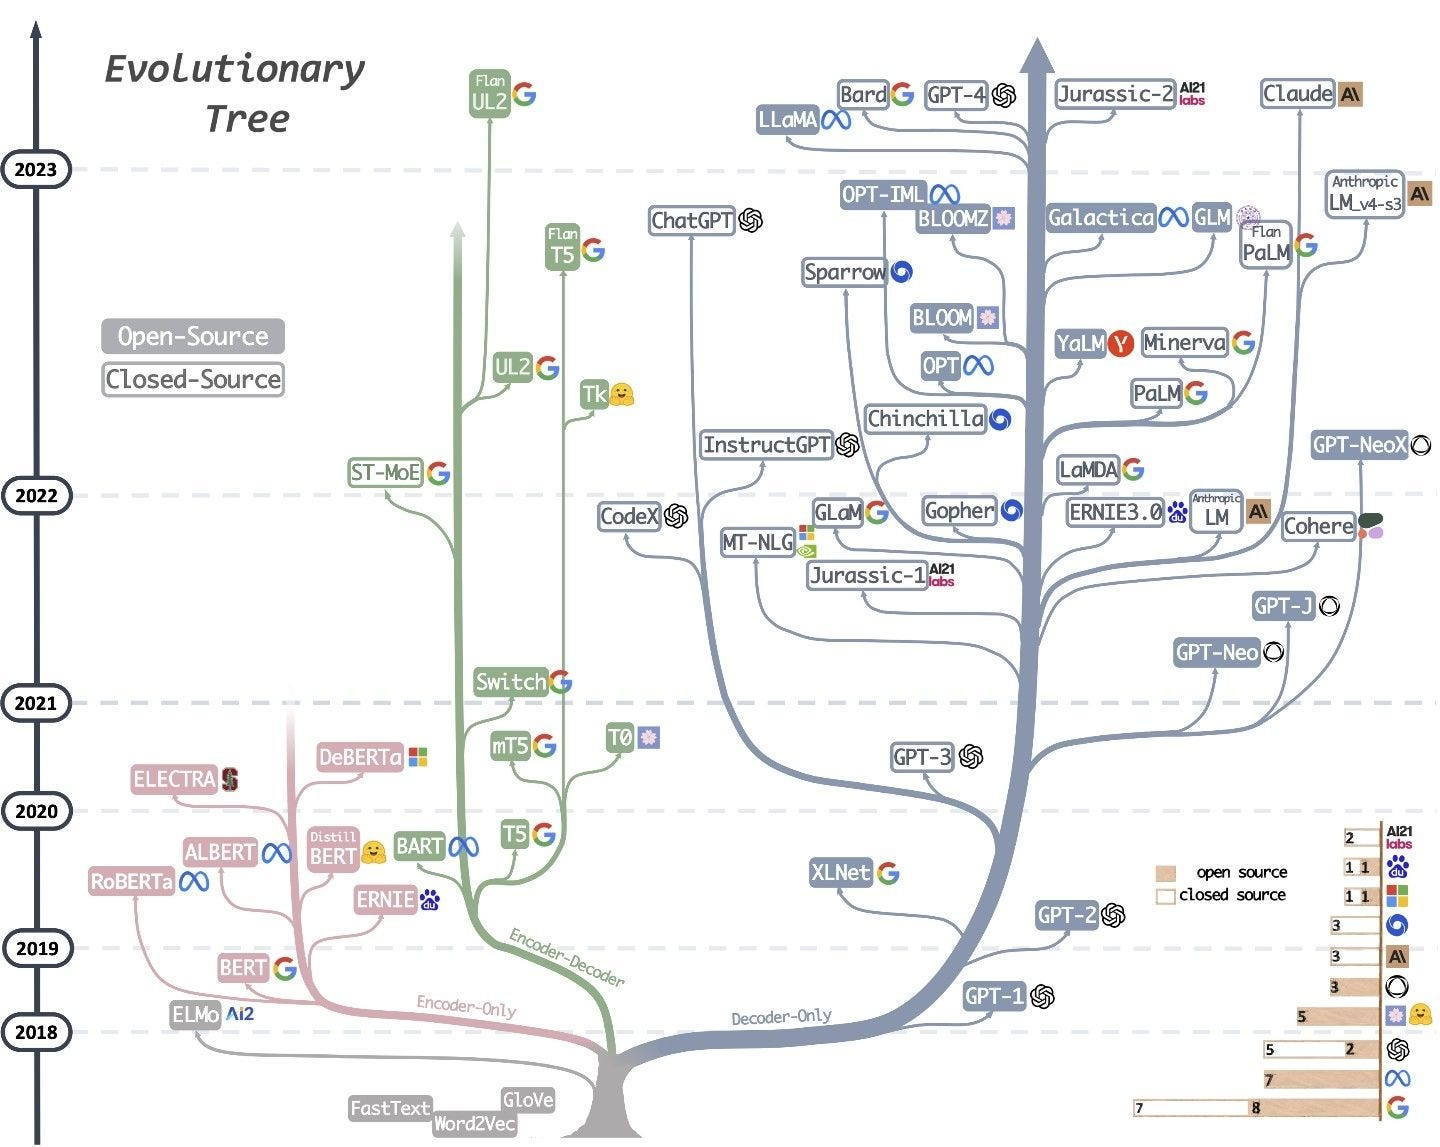

[Source](https://cdn.prod.website-files.com/649300f3606e51cb999842df/6564b4642a0ffd90a4da3b2c_LLMs%20_Tree_.jpg)

### OpenAI  
LlamaIndex integrates with **OpenAI’s GPT models**, which are among the most advanced **transformer-based language models**. Using OpenAI’s API, you can utilize the following capabilities:

- **Text generation** for natural language responses  
- **Text summarization** for concise summaries of long documents  
- **Text-based reasoning** for answering complex questions based on context  

* **Use case:** When you need **state-of-the-art NLP capabilities** powered by **GPT models** such as `GPT-3` and `GPT-4`.  



In [ ]:
import os
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage

In [ ]:
llm = OpenAI(model="gpt-4")

#### call complete method with prompt

In [ ]:
response = llm.complete("Write an email for new product launch")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:
print(response.text)

Subject: Introducing Our Exciting New Product - [Product Name]

Dear [Customer's Name],

We hope this email finds you well. We are thrilled to announce the launch of our latest product, [Product Name], which we have been developing and perfecting over the past few months. 

Our team at [Your Company's Name] has been working tirelessly to bring you a product that not only meets your needs but also exceeds your expectations. We believe that [Product Name] is a testament to our commitment to quality and innovation.

[Product Name] is designed to [describe what the product does and its benefits]. We have incorporated advanced technology and user-friendly features to ensure that it delivers top-notch performance and convenience. 

We are confident that [Product Name] will add significant value to your [daily life/work/business], and we are excited for you to experience its benefits firsthand.

To celebrate the launch of [Product Name], we are offering an exclusive [discount/special offer] f

#### call chat with list of messages

In [ ]:

messages = [
    ChatMessage(
        role="system",
        content="You are an AI assistant designed to provide helpful and accurate responses to user queries."
    ),
    ChatMessage(
        role="user",
        content="Compose a professional email announcing the launch of a new product."
    )
]

In [ ]:
response = OpenAI().chat(messages)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:
print(response)

assistant: Subject: Exciting Announcement: Introducing Our New Product - [Product Name]

Dear [Recipient's Name],

I am thrilled to announce the launch of our latest product, [Product Name]! After months of hard work and dedication from our team, we are excited to bring this innovative solution to our customers.

[Product Name] is designed to [briefly describe the key features and benefits of the product]. We believe that this product will [mention how it will address customer needs or pain points].

To celebrate the launch of [Product Name], we are offering an exclusive introductory offer for our valued customers. This is your chance to be one of the first to experience the benefits of this exciting new product.

For more information about [Product Name], including pricing and availability, please visit our website [insert website link] or contact our sales team at [insert contact information].

Thank you for your continued support. We are confident that [Product Name] will exceed you

#### Using stream_chat endpoint

In [ ]:
messages = [
    ChatMessage(
        role="system",
        content="You are an AI assistant designed to provide helpful and accurate responses to user queries."
    ),
    ChatMessage(
        role="user",
        content="Compose a professional email announcing the launch of a new product."
    )
]

In [ ]:
response = llm.stream_chat(messages)

In [ ]:
for r in response:
  print(r.delta, end="")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Subject: Introducing Our Exciting New Product Launch

Dear [Recipient's Name],

I hope this message finds you well. I am thrilled to announce that [Your Company's Name] is launching a new product, [Product's Name], which will be available from [Launch Date].

Our team has been working tirelessly to develop [Product's Name], a product designed to [describe the problem the product solves or the need it meets]. We believe that this innovative product will significantly enhance your experience with [specific task or activity] and provide a solution that is both efficient and effective.

Key features of [Product's Name] include:

1. [Feature 1]
2. [Feature 2]
3. [Feature 3]
4. [Feature 4]

We are confident that these features, along with many others, will provide you with the tools you need to [describe what the user can achieve with the product].

To celebrate the launch of [Product's Name], we are offering an exclusive [discount/promotion] to our valued customers. Simply use the code [Pro

### Configure Model

In [ ]:
llm = OpenAI(model="gpt-4", temperature=0.6)

In [ ]:
response = llm.complete("write a short poem on generative AI")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:
print(response)

In the realm of silicon minds, awake,
Generative AI, a new dawn it does make.
Creating, learning, ceaselessly it strides,
In data streams and binary tides.

Artistry of language, music, and design,
From the depths of code, it starts to mine.
Words into sentences, notes into song,
In the digital realm, it does belong.

Painting a world with neural net's brush,
In silence, it works, in the midnight's hush.
Crafting stories from fragments of thought,
In the tapestry of data, it is caught.

Mirroring human mind's intricate dance,
In the realm of chance, it takes a stance.
A sonnet, a symphony, a stroke of art,
Generative AI plays its part.

Yet it's not the soul, nor the heart's yearn,
It's but a machine, forever to learn.
In the dance of creation, it's a start,
A testament to human mind's art.


#### Call chat with list of messages

In [ ]:
messages = [
    ChatMessage(
        role="system",
        content="You are an AI assistant designed to provide helpful and accurate responses to user queries."
    ),
    ChatMessage(
        role="user",
        content="write a short poem on generative AI"
    )
]

In [ ]:
response = llm.chat(messages)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:
print(response)

assistant: In the realm where data streams freely flow,
A marvel of technology begins to grow.
Generative AI, the mind of code,
In the digital world, makes its abode.

Crafted by minds of logic and skill,
To understand, learn, and fulfill.
Patterns recognized, insights gained,
In its complex, neural network-brained.

From a simple seed, ideas proliferate,
In text, in art, it can create.
Mimicking a human's gentle sway,
In countless forms, night or day.

Crafting tales, painting scenes so bright,
In the vast expanse of data's night.
It learns, it changes, it adapts with grace,
In the ever-evolving, digital space.

Generative AI, a marvel to behold,
A story of the future, yet to be told.
A testament to human's innovative drive,
In this digital age, it thrives and thrives.


Now that we've explored how **LLMs** help generate intelligent responses, the next step is to **organize our data** using **indexes**. LlamaIndex offers several types of indexes for efficient data retrieval.

Let's move on to the **Indexing** section!

## Indexing

In [42]:
import os

In [43]:
from pathlib import Path
from llama_index.readers.file import PDFReader

In [44]:
loader = PDFReader()

In [45]:
documents = loader.load_data(file=Path("/content/data/transformers.pdf"))

In [46]:
len(documents)

15

In [47]:
%%capture
documents[5]


### Vector Store Index  

The **Vector Store Index** is used for **retrieval-augmented generation (RAG)** tasks, where text is converted into vectors and stored in a **vector database**.

It allows for fast similarity-based retrieval of information, which is useful when you're dealing with large amounts of unstructured data like documents or web pages.  

* **Use case:** When you need **semantic search** and fast retrieval of documents based on vector similarity.  


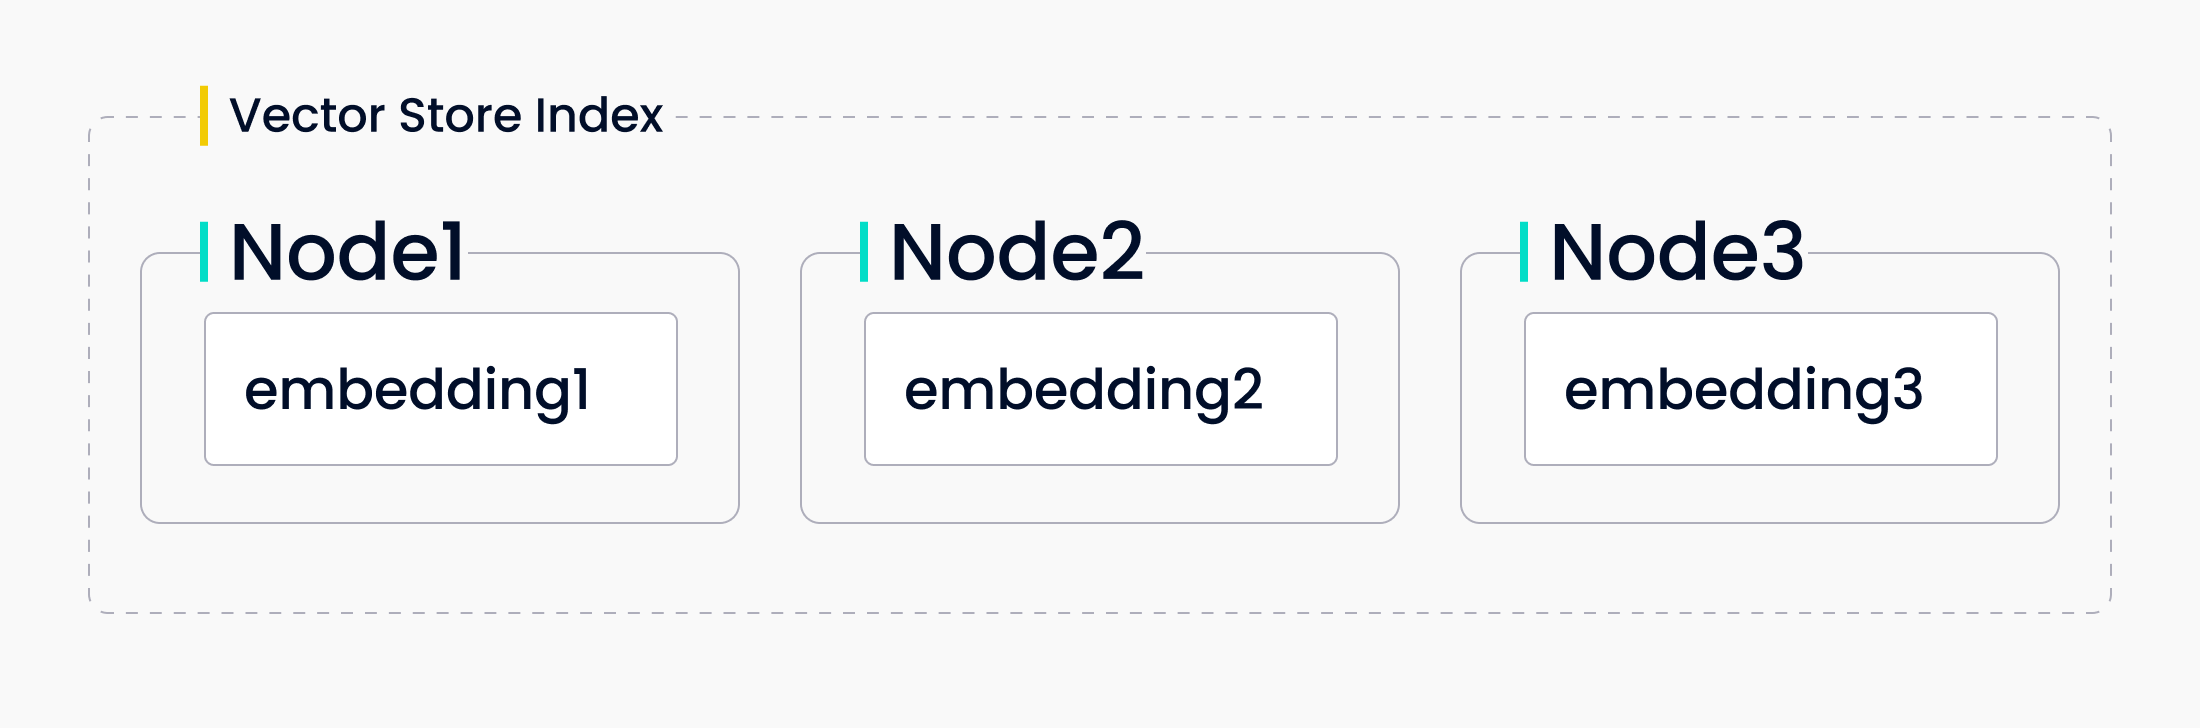

[Source](https://zilliz.com/learn/getting-started-with-llamaindex)

In [ ]:
from llama_index.core import VectorStoreIndex

In [ ]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.llms.huggingface import HuggingFaceInferenceAPI

In [ ]:
embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-small-en-v1.5
INFO:sentence_transformers.SentenceTransformer:2 prompts are loaded, with the keys: ['query', 'text']


In [ ]:
index = VectorStoreIndex.from_documents(
                                          documents,
                                          embed_model=embed_model
                                      )

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
index

### Summary Index  

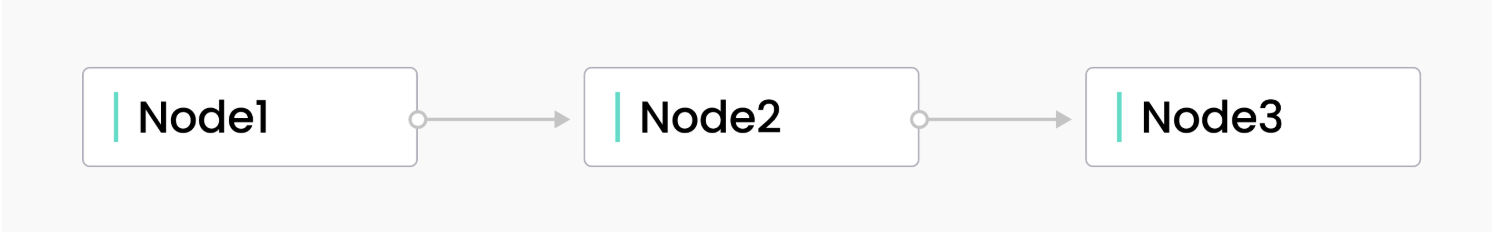

[Source](https://zilliz.com/learn/getting-started-with-llamaindex)

The **Summary Index** helps summarize large collections of text by storing **pre-summarized content**. This index is useful when you want to generate high-level summaries of documents or articles, enabling you to quickly get the gist of a large dataset without having to process all the raw content.  

* **Use case:** When you need a **high-level overview** of large datasets, enabling **quick content summaries**.  


In [ ]:
from llama_index.core import SummaryIndex

In [ ]:
index = SummaryIndex.from_documents(
    documents,
    embed_model = embed_model
)

In [ ]:
index

### Keyword Table Index  

The **Keyword Table Index** is designed for scenarios where you need to index and retrieve data based on **keywords or phrases**. This is particularly useful when dealing with **structured data** like spreadsheets or databases, where data retrieval often depends on searching for specific terms or tags.  

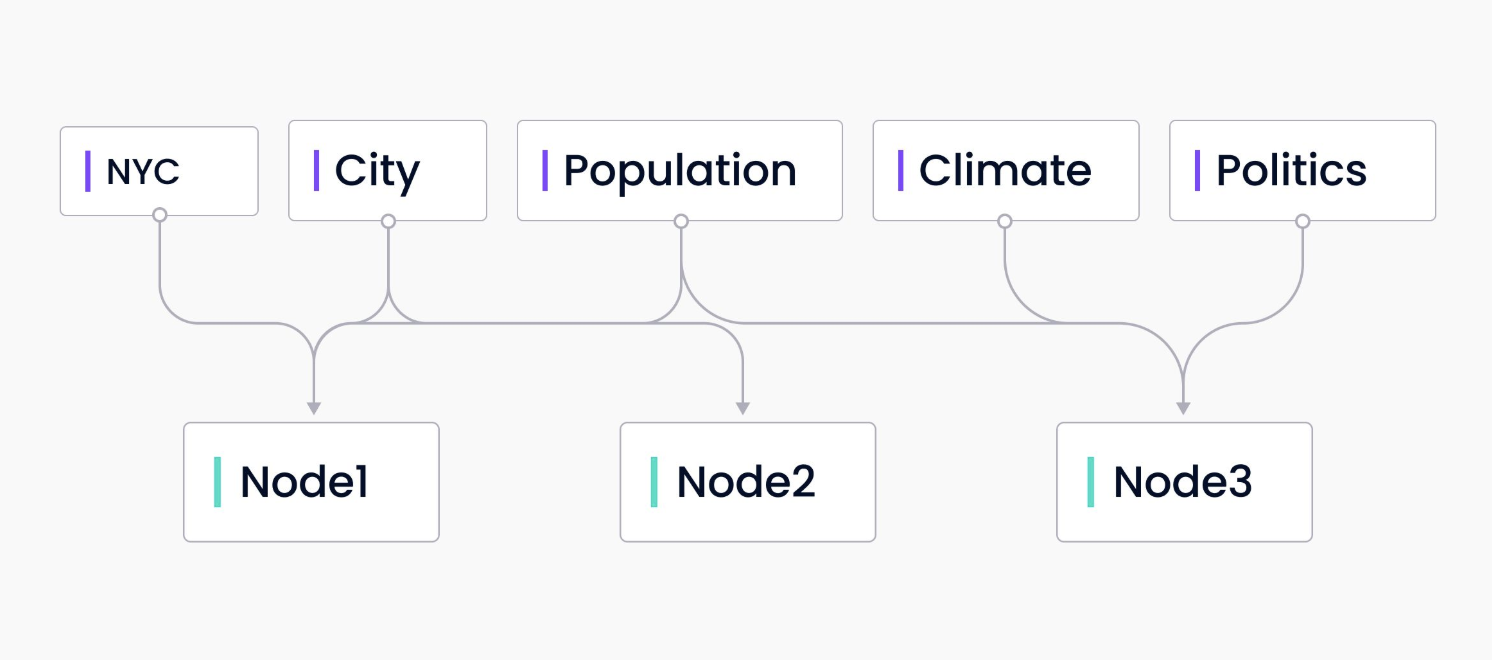

[Source](https://zilliz.com/learn/getting-started-with-llamaindex)

* **Use case:** When you need to perform **exact keyword matching** or **retrieve specific rows** based on keywords.  


In [ ]:
from llama_index.core import SimpleKeywordTableIndex

In [ ]:
llm = HuggingFaceInferenceAPI(model_name='google/gemma-7b')

<ipython-input-133-309c1b32c899>:1: DeprecationWarning: Call to deprecated class HuggingFaceInferenceAPI. (Deprecated in favor of `HuggingFaceInferenceAPI` from `llama-index-llms-huggingface-api` which should be used instead.)
  llm = HuggingFaceInferenceAPI(model_name='google/gemma-7b')


In [ ]:
keyword_table_index = SimpleKeywordTableIndex.from_documents(
                                                              documents,
                                                              embed_model=embed_model,
                                                              llm=llm,
                                                              show_progress=True
                                                          )

Parsing nodes:   0%|          | 0/15 [00:00<?, ?it/s]

Extracting keywords from nodes:   0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
keyword_table_index

### Document Summary Index  

The **Document Summary Index** stores **summaries of entire documents** rather than individual pieces of text. It’s an optimized index for retrieving concise, **contextual summaries** of documents, enabling fast lookups of document-level information.

* **Use case:** When you need to retrieve **concise summaries** of large documents or when document context is essential.  


In [ ]:
from llama_index.core import DocumentSummaryIndex, get_response_synthesizer

In [ ]:
response_synthesizer = get_response_synthesizer(
                            response_mode = "tree_summarize",
                            llm = llm
                        )

In [ ]:
doc_summary_index = DocumentSummaryIndex.from_documents(
    documents,
    embed_model = embed_model,
    llm = llm,
    response_synthesizer = response_synthesizer,
    show_progress = True
)

Parsing nodes:   0%|          | 0/15 [00:00<?, ?it/s]

Summarizing documents:   0%|          | 0/15 [00:00<?, ?it/s]

current doc id: 0f554680-2e96-4c72-98a2-9b9ab612e4f5


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 0f554680-2e96-4c72-98a2-9b9ab612e4f5: 
The text is about a new type of neural network architecture called the Transformer. The Transformer is a new type of neural network that is based solely on attention mechanisms. The Transformer is a new type of neural network that is based solely on attention mechanisms. The Transformer is a new type of neural network that is based solely on attention mechanisms. The Transformer is a new type of neural network that is based solely on attention mechanisms. The Transformer is a new type of neural network that is based solely on attention mechanisms. The Transformer is a new type of neural network that is based solely on attention mechanisms. The Transformer is a new type of neural network that is based solely on attention mechanisms. The Transformer is a new type of neural network that is based solely on attention mechanisms. The Transformer is a new type of neural netwo

current doc id: 8dff6afd-dc68-4e6b-8dfe-415544a2c06a


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 8dff6afd-dc68-4e6b-8dfe-415544a2c06a: 
The Transformer is a model architecture that eschews recurrence and instead relies entirely on an attention mechanism to draw global dependencies between input and output. The Transformer allows for significantly more parallelization and can reach a new state of the art in translation quality after being trained for as little as twelve hours on eight P100 GPUs.
The Transformer is a model architecture that eschews recurrence and instead relies entirely on an attention mechanism to draw global dependencies between input and output. The Transformer allows for significantly more parallelization and can reach a new state of the art in translation quality after being trained for as little as twelve hours on eight P100 GPUs.
The Transformer is a model architecture that eschews recurrence and instead relies entirely on an attention mechanism to draw global dependencies between

current doc id: 7fcfba34-00fc-4d3e-89bd-1a29dfeae504


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 7fcfba34-00fc-4d3e-89bd-1a29dfeae504: 
The text is about the architecture of the transformer model. The model is composed of a stack of N = 6 identical layers. Each layer has two sub-layers. The first is a multi-head self-attention mechanism, and the second is a simple, position-wise fully connected feed-forward network. We employ a residual connection [11] around each of the two sub-layers, followed by layer normalization [ 1]. That is, the output of each sub-layer is LayerNorm(x + Sublayer(x)), where Sublayer(x) is the function implemented by the sub-layer itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding layers, produce outputs of dimension dmodel = 512.
The text can answer questions about the architecture of the transformer model.


current doc id: f0cbc12d-3ecb-4b9b-9228-fe17d7c7753b


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc f0cbc12d-3ecb-4b9b-9228-fe17d7c7753b: 
The text is about a type of attention mechanism called "Scaled Dot-Product Attention". It describes how this attention mechanism works and how it is used in a model called "Multi-Head Attention". The text also explains the difference between "additive attention" and "dot-product attention", and why "dot-product attention" is faster and more space-efficient. The text also describes how to use "dot-product attention" with large values of "dk" and why it is important to scale the dot products by "1/sqrt(dk)". The text also explains how to use "Multi-Head Attention" by performing "attention function" with different linear projections of the "queries", "keys" and "values". The text also describes the difference between "additive attention" and "dot-product attention" and why "dot-product attention" is faster and more space-efficient. The text also describes how to use "dot-

current doc id: ef48b381-babe-4079-be2d-d957107c14d6


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc ef48b381-babe-4079-be2d-d957107c14d6: 
The text is about the Transformer model. The text can answer questions about the Transformer model, such as what it is, how it works, and what its advantages and disadvantages are.


current doc id: fdb99a4e-9c63-4b64-a65f-caae4a345e9c


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc fdb99a4e-9c63-4b64-a65f-caae4a345e9c: 
The text is about a comparison of different layer types in a neural network. The table shows the maximum path lengths, per-layer complexity and minimum number of sequential operations for different layer types. The layer types are self-attention, recurrent, convolutional and self-attention (restricted). The complexity per layer is O(n2 · d) for self-attention, O(n · d2) for recurrent, O(k · n · d2) for convolutional and O(r · n · d) for self-attention (restricted). The sequential maximum path length is O(1) for all layer types except for self-attention (restricted), which is O(n/r). The text also describes the use of sine and cosine functions for positional encodings in the self-attention layer. The text can answer questions about the comparison of different layer types in a neural network, the complexity and path length of each layer type, and the use of positional en

current doc id: 05421457-85c8-4261-8cd1-798a968d5c72


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 05421457-85c8-4261-8cd1-798a968d5c72: 
The paper describes a new model for machine translation that uses self-attention to learn a representation of the input sequence. The model is able to learn a representation of the input sequence that is more efficient than previous models, and is able to learn a representation of the input sequence that is more accurate than previous models. The model is able to learn a representation of the input sequence that is more efficient than previous models, and is able to learn a representation of the input sequence that is more accurate than previous models. The model is able to learn a representation of the input sequence that is more efficient than previous models, and is able to learn a representation of the input sequence that is more accurate than previous models. The model is able to learn a representation of the input sequence that is more efficient than previous mod

current doc id: 523425b6-9e1e-44af-92d7-e6aac9b66737


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 523425b6-9e1e-44af-92d7-e6aac9b66737: 
The text is about a new model for machine translation called the Transformer. The Transformer is a new model that is able to achieve better BLEU scores than previous state-of-the-art models on the English-to-German and English-to-French newstest2014 tests at a fraction of the training cost. The Transformer is a new model that is able to achieve better BLEU scores than previous state-of-the-art models on the English-to-German and English-to-French newstest2014 tests at a fraction of the training cost. The Transformer is a new model that is able to achieve better BLEU scores than previous state-of-the-art models on the English-to-German and English-to-French newstest2014 tests at a fraction of the training cost. The Transformer is a new model that is able to achieve better BLEU scores than previous state-of-the-art models on the English-to-German and English-to-French ne

current doc id: 0c0cc372-56fe-4bb3-ab87-58413ecee513


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 0c0cc372-56fe-4bb3-ab87-58413ecee513: 
The Transformer is a new type of neural network that can be used to perform a variety of tasks, including machine translation, natural language processing, and image recognition. The Transformer is able to process long sequences of data in a single pass, which makes it well-suited for tasks that require a lot of data processing. The Transformer is also able to learn from a large amount of data, which makes it a good choice for tasks that require a lot of training data.
The Transformer is able to answer questions about the text that it has been trained on. For example, the Transformer can answer questions about the meaning of a word or phrase, the context in which a word or phrase is used, and the relationship between two words or phrases. The Transformer is also able to answer questions about the structure of a sentence or paragraph.


current doc id: 5c2c521a-0685-4f0f-ace7-75c896ca540c


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 5c2c521a-0685-4f0f-ace7-75c896ca540c: 
The Transformer is a new type of neural network that is designed to be more efficient and accurate than previous models. The Transformer is able to process text more quickly and accurately than previous models, and it is also able to learn from a larger amount of data. The Transformer is able to answer questions about the text that it is processing, and it is also able to generate new text based on the information that it has learned.


current doc id: 88180aeb-d11c-486b-a8f4-24c3a11a8109


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 88180aeb-d11c-486b-a8f4-24c3a11a8109: 
This text is about a neural network model that can be used for natural language processing tasks. The model is based on a recurrent neural network and is able to learn long-term dependencies in the input data. The model is also able to generate new text based on the input data.


current doc id: f5d6a7f6-4774-4277-acb0-607b49549a02


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc f5d6a7f6-4774-4277-acb0-607b49549a02: 
The text is about a neural network model for natural language processing. The model is based on a sequence to sequence learning approach and uses a combination of attention and memory networks. The model is trained on a large corpus of text and is able to perform a variety of natural language processing tasks, such as text generation, question answering, and text classification. The model is also able to learn from its own mistakes and improve over time.


current doc id: 99c306b2-90c4-4b15-9d38-f0d3f24c68d2


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 99c306b2-90c4-4b15-9d38-f0d3f24c68d2: 
The text is about the laws that have been passed in the United States since 2009 to make the process of registration or voting more difficult. The text also mentions that a majority of American governments have passed these laws.
Some of the questions that this text can answer are:
What are the laws that have been passed in the United States since 2009 to make the process of registration or voting more difficult?
What is the spirit in which these laws have been passed?
What is the role of American governments in passing these laws?
What is the impact of these laws on the process of registration or voting?
What is the reason behind the passing of these laws?
What is the impact of these laws on the American people?
What is the future of these laws in the United States?
What is the current status of these laws in the United States?
What is the future of the process of reg

current doc id: 698684ff-f79c-4e29-bea0-0c771e76d57e


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 698684ff-f79c-4e29-bea0-0c771e76d57e: 
The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its a

current doc id: bf111611-a78a-4324-9ec7-3a23992e59d1


INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc bf111611-a78a-4324-9ec7-3a23992e59d1: 
The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its application. The text is about the law and its a

Generating embeddings:   0%|          | 0/15 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
doc_summary_index

Now that we’ve covered **indexing** strategies for different types of data, let’s move on to **Vector Databases**. This component allows you to **store** and **manage** your indexes efficiently.

Let’s jump into **Vector DB** next!

## Vector DB

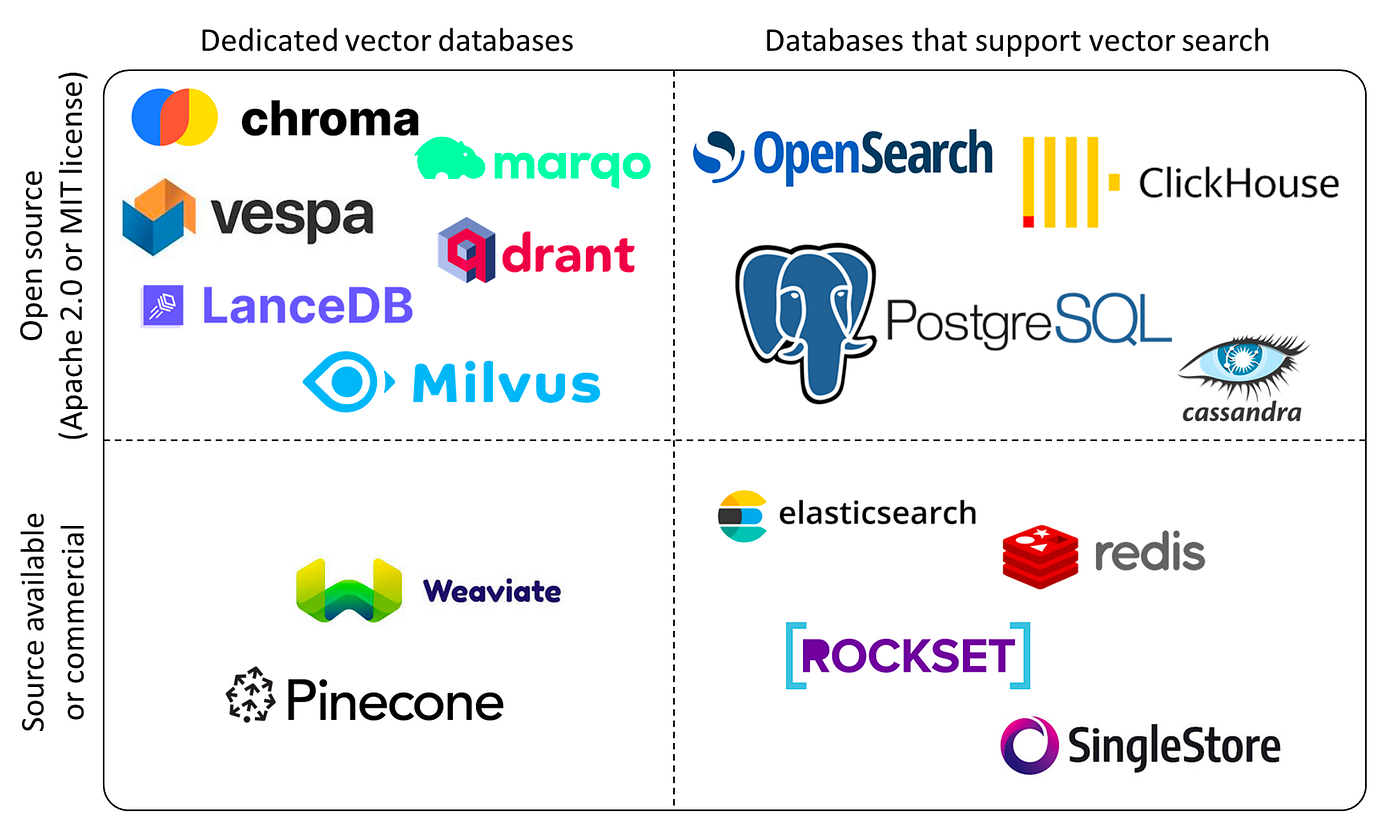

[Source](https://www.infracloud.io/assets/img/blog/vector-databases-primer/vector-databases-landscape.png)

In [ ]:
import os

In [ ]:
!wget https://github.com/run-llama/llama_index/blob/b224ff42d045dd2c3839c03a5c9e35f4c1303e79/docs/docs/examples/data/10k/uber_2021.pdf

--2025-03-22 19:20:32--  https://github.com/run-llama/llama_index/blob/b224ff42d045dd2c3839c03a5c9e35f4c1303e79/docs/docs/examples/data/10k/uber_2021.pdf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘uber_2021.pdf’

uber_2021.pdf           [ <=>                ] 219.59K  --.-KB/s    in 0.1s    

2025-03-22 19:20:33 (1.80 MB/s) - ‘uber_2021.pdf’ saved [224862]



In [ ]:
loader = PDFReader()

In [ ]:
documents = loader.load_data(file=Path('/content/uber_2021.pdf'))

In [ ]:
len(documents)

307

### vectorStoreIndex

In [ ]:
index = VectorStoreIndex.from_documents(documents=documents)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
index

#### Save Index to Local Disk  

LlamaIndex provides an option to **save your vector index locally** to your disk, making it possible to keep your indexes accessible even without cloud infrastructure.

This option is suitable for small to medium-sized datasets where cloud services may not be required.  

* **Use case:** When you want to **store indexes locally** for easy access or when working on a smaller project.  



In [ ]:
!mkdir index
index.storage_context.persist(persist_dir="index")

In [ ]:
from llama_index.core import StorageContext, load_index_from_storage

In [ ]:
# rebuild storage context
storage_context = StorageContext.from_defaults(persist_dir="index")

In [ ]:
# load index
index = load_index_from_storage(storage_context=storage_context)

INFO:llama_index.core.indices.loading:Loading all indices.



### Using ChromaDB  

**ChromaDB** is a popular open-source vector database that is integrated with LlamaIndex. It is optimized for storing and querying **high-dimensional vectors** and is especially useful for **semantic search** and retrieval tasks.

ChromaDB can be hosted locally or in the cloud and provides excellent scalability for larger datasets.  

* **Use case:** When you need **scalable, open-source vector storage** for handling a growing dataset.  


In [ ]:
import chromadb
from llama_index.vector_stores.chroma import ChromaVectorStore

In [ ]:
# load documents
documents = SimpleDirectoryReader(
                      input_files = [
                          '/content/uber_2021.pdf'
                      ]
                  ).load_data()

In [ ]:
# initialize client, setting path to save data
db = chromadb.PersistentClient(path="chroma_db")

INFO:chromadb.telemetry.product.posthog:Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


In [ ]:
# create collection
chroma_collection = db.get_or_create_collection("quickstart")

In [ ]:
# assign chroma as the vector_store to the context
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

In [ ]:
# create index
index = VectorStoreIndex.from_documents(
                    documents,
                    storage_context = storage_context
                )

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
index

### Using Pinecone  

**Pinecone** is a fully-managed vector database service that is designed for high-performance similarity search. LlamaIndex seamlessly integrates with Pinecone, allowing you to store and manage vectors in the cloud.

Pinecone is known for its ability to handle **millions of vectors** and scale automatically as your data grows.  

* **Use case:** When you need a **cloud-native, managed solution** with **automatic scaling** and high availability for your vector data.  


In [ ]:
from pinecone import Pinecone, PodSpec, ServerlessSpec


In [ ]:
from google.colab import userdata
PINECONE_API_KEY = userdata.get('PINECONE_API_KEY')

In [ ]:
os.environ['PINECONE_API_KEY'] =  PINECONE_API_KEY

In [ ]:
pc = Pinecone()

In [ ]:

# Create a serverless index
pc.create_index(
          name = "quickstart",
          dimension = 1536,  # Adjust based on your embedding model
          metric = "cosine",  # Or "euclidean", "dotproduct"
          spec = ServerlessSpec(
              cloud="aws",
              region="us-east-1"
          )
    )

{
    "name": "quickstart",
    "metric": "cosine",
    "host": "quickstart-2u3es1f.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 1536,
    "deletion_protection": "disabled",
    "tags": null
}

In [ ]:
pinecone_index = pc.Index("quickstart")

In [ ]:
from llama_index.vector_stores.pinecone import PineconeVectorStore

In [ ]:
vector_store = PineconeVectorStore(pinecone_index = pinecone_index)

In [ ]:
storage_context = StorageContext.from_defaults(vector_store=vector_store)

In [ ]:
index = VectorStoreIndex.from_documents(
                      documents,
                      storage_context = storage_context
                  )

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


Upserted vectors:   0%|          | 0/394 [00:00<?, ?it/s]

In [ ]:
index

Now that we’ve covered **Vector DBs** for storing our indexes, the next step is to **retrieve** the stored information efficiently. In LlamaIndex, we have several retriever types that work with our indexes.

Let’s move on to **Retrievers**!

## Retriever

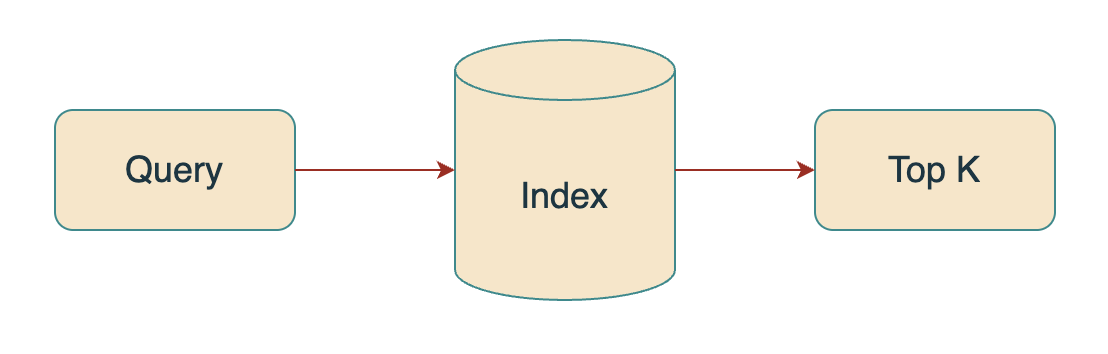


In [ ]:
loader = PDFReader()

In [ ]:
documents = loader.load_data(file=Path('/content/data/transformers.pdf'))

### Vector Store Index Retriever  

The **Vector Store Index Retriever** uses vector similarity to **retrieve the most relevant documents** based on a query. It leverages the **vector embeddings** stored in a vector database to identify documents that are semantically similar to the query. This is particularly useful for tasks like **semantic search** and **retrieval-augmented generation** (RAG).   


In [ ]:
index = VectorStoreIndex.from_documents(documents=documents)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
retriever = index.as_retriever(similarity_top_k = 5)

In [ ]:
nodes = retriever.retrieve("what is multi-head attention?")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
len(nodes)

5

In [ ]:
for node in nodes:
  print("Node ID: ", node.id_)
  print("Metadata: ", node.metadata)
  print("Score: ", node.get_score())
  print("-"*50)

Node ID:  a5b86352-4e74-4cfd-bebc-2aa6f3a70565
Metadata:  {'page_label': '5', 'file_name': 'transformers.pdf'}
Score:  0.8592382524804097
--------------------------------------------------
Node ID:  db31409d-4c8b-458e-85e3-9992948219f0
Metadata:  {'page_label': '4', 'file_name': 'transformers.pdf'}
Score:  0.8520616808932874
--------------------------------------------------
Node ID:  e551f1c3-c655-43fe-9eba-4ad388ec7d5c
Metadata:  {'page_label': '13', 'file_name': 'transformers.pdf'}
Score:  0.8093430534827353
--------------------------------------------------
Node ID:  37151717-3318-455a-a5c2-ad9b3794c8fd
Metadata:  {'page_label': '1', 'file_name': 'transformers.pdf'}
Score:  0.8018194432416043
--------------------------------------------------
Node ID:  b89860c6-0e45-4a74-b180-cfff0370a204
Metadata:  {'page_label': '14', 'file_name': 'transformers.pdf'}
Score:  0.8010569695846538
--------------------------------------------------


### Summary Index Retriever  

The **Summary Index Retriever** retrieves pre-generated **summaries** from the indexed data. It’s designed to extract the most relevant **summarized content** based on the query, which is useful for quickly getting concise answers without needing to scan large amounts of raw text.  


#### Using LLM Retriever Mode

In [ ]:
index = SummaryIndex.from_documents(documents=documents)

In [ ]:
retriever = index.as_retriever(
                      retriever_mode="llm",
                      choice_batch_size = 4)

In [ ]:
nodes = retriever.retrieve("what is multi-head attention?")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:
for node in nodes:
  print("Node ID: ", node.id_)
  print("Metadata: ", node.metadata)
  print("Score: ", node.get_score())
  print("-"*50)

Node ID:  6d764d7f-1ee4-4c42-a10c-5276138cf866
Metadata:  {'page_label': '4', 'file_name': 'transformers.pdf'}
Score:  10.0
--------------------------------------------------
Node ID:  09beabf1-457b-4454-9953-bc960bf8b787
Metadata:  {'page_label': '3', 'file_name': 'transformers.pdf'}
Score:  8.0
--------------------------------------------------
Node ID:  38aa1c97-1462-4e47-b508-fa167afc6b42
Metadata:  {'page_label': '5', 'file_name': 'transformers.pdf'}
Score:  10.0
--------------------------------------------------
Node ID:  b72d49f7-985e-4fe6-8c1b-95d693f3bd0f
Metadata:  {'page_label': '6', 'file_name': 'transformers.pdf'}
Score:  8.0
--------------------------------------------------
Node ID:  f509da89-1a36-48f9-bcd3-63f44afb34b5
Metadata:  {'page_label': '7', 'file_name': 'transformers.pdf'}
Score:  7.0
--------------------------------------------------
Node ID:  0557b1c3-6288-4707-838e-37807cd7a717
Metadata:  {'page_label': '9', 'file_name': 'transformers.pdf'}
Score:  10.0
----


#### Using Embedding Retriever Mode

In [ ]:
retriever = index.as_retriever(
                    retriever_mode = "embedding",
                    choice_batch_size = 4,
                    similarity_top_k = 5
                )

In [ ]:
retriever = retriever.retrieve("what is multi-head attention?")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embedding

In [ ]:
len(nodes)

10

In [ ]:
for node in nodes:
  print("Node ID: ", node.id_)
  print("Metadata: ", node.metadata)
  print("Score: ", node.get_score())
  print("-"*50)

Node ID:  6d764d7f-1ee4-4c42-a10c-5276138cf866
Metadata:  {'page_label': '4', 'file_name': 'transformers.pdf'}
Score:  10.0
--------------------------------------------------
Node ID:  09beabf1-457b-4454-9953-bc960bf8b787
Metadata:  {'page_label': '3', 'file_name': 'transformers.pdf'}
Score:  8.0
--------------------------------------------------
Node ID:  38aa1c97-1462-4e47-b508-fa167afc6b42
Metadata:  {'page_label': '5', 'file_name': 'transformers.pdf'}
Score:  10.0
--------------------------------------------------
Node ID:  b72d49f7-985e-4fe6-8c1b-95d693f3bd0f
Metadata:  {'page_label': '6', 'file_name': 'transformers.pdf'}
Score:  8.0
--------------------------------------------------
Node ID:  f509da89-1a36-48f9-bcd3-63f44afb34b5
Metadata:  {'page_label': '7', 'file_name': 'transformers.pdf'}
Score:  7.0
--------------------------------------------------
Node ID:  0557b1c3-6288-4707-838e-37807cd7a717
Metadata:  {'page_label': '9', 'file_name': 'transformers.pdf'}
Score:  10.0
----

### Keyword Table Index Retriever

The **Keyword Table Index Retriever** works with **keyword-based indexes**, where data is indexed and retrieved based on **specific keywords or tags**. This retriever is ideal for structured data, such as tables or databases, where the query can be matched to exact keywords or attributes.  


In [ ]:
keyword_table_index = SimpleKeywordTableIndex.from_documents(
                                              documents = documents,
                                              show_progress = True,
                                          )

Parsing nodes:   0%|          | 0/15 [00:00<?, ?it/s]

Extracting keywords from nodes:   0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
retriever = keyword_table_index.as_retriever(response_node = "simple")

In [ ]:
nodes = retriever.retrieve("what is multi-head attention?")

INFO:llama_index.core.indices.keyword_table.retrievers:> Starting query: what is multi-head attention?
INFO:llama_index.core.indices.keyword_table.retrievers:query keywords: ['head', 'multi', 'attention']
INFO:llama_index.core.indices.keyword_table.retrievers:> Extracted keywords: ['head', 'attention']


In [ ]:
len(nodes)

8

In [ ]:
for node in nodes:
  print("Node ID: ", node.id_)
  print("Metadata: ", node.metadata)
  print("-"*50)

Node ID:  c0c8938a-4579-4c56-8cf1-9d144a7ef18a
Metadata:  {'page_label': '5', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  9954f136-deee-484f-8c12-324fc71551ae
Metadata:  {'page_label': '3', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  0c6f8693-58c4-4759-9134-50a103eae942
Metadata:  {'page_label': '1', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  df6be031-c4d7-404d-8072-d684df5a4db9
Metadata:  {'page_label': '13', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  5ac95775-ec75-4d92-b80b-094b449b2b9c
Metadata:  {'page_label': '7', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  fcaa9b9b-997b-46e4-b663-eb1b1e387531
Metadata:  {'page_label': '4', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  f7d0bd03-2223-44c

### Document Summary Index Retriever  

The **Document Summary Index Retriever** extracts **summarized content** at the document level rather than at the piece-by-piece level. This is ideal when you want to retrieve a **concise summary** of an entire document or a set of documents based on a query.  


In [ ]:
response_synthesizer = get_response_synthesizer(
                                response_mode = "tree_summarize"
                            )

In [ ]:
doc_summary_index = DocumentSummaryIndex.from_documents(
                          documents,
                          response_synthesizer = response_synthesizer,
                          show_progress = True
                      )

Parsing nodes:   0%|          | 0/15 [00:00<?, ?it/s]

Summarizing documents:   0%|          | 0/15 [00:00<?, ?it/s]

current doc id: c0bbae00-22ca-4866-a5f5-5055f9a532a6


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc c0bbae00-22ca-4866-a5f5-5055f9a532a6: The text discusses a new network architecture called the Transformer, which is based solely on attention mechanisms and eliminates the need for recurrent or convolutional neural networks in sequence transduction models. The Transformer model is shown to outperform existing models in terms of quality, parallelizability, and training time efficiency, particularly in machine translation tasks. The text also highlights the achievements of the Transformer model in tasks such as English-to-German and English-to-French translation, as well as English constituency parsing.

Some questions that this text can answer include:
- What is the Transformer model and how does it differ from traditional sequence transduction models?
- How does the Transformer model perform in comparison to existing

current doc id: b335f350-7a19-498c-9edb-e4b7112ef545


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc b335f350-7a19-498c-9edb-e4b7112ef545: The text discusses the development of a model architecture called the Transformer, which relies solely on an attention mechanism to establish global dependencies between input and output sequences, eliminating the need for recurrence in neural networks. It highlights the advantages of the Transformer in terms of parallelization and computational efficiency compared to traditional recurrent models. The text also mentions other models like Extended Neural GPU, ByteNet, and ConvS2S that aim to reduce sequential computation through different approaches.

Some questions that this text can answer include:
- What are some state-of-the-art approaches in sequence modeling and transduction problems?
- How does the Transformer model differ from traditional recurrent neural networks in terms 

current doc id: e40d9298-ee47-409d-a3c3-578cc79e6300


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc e40d9298-ee47-409d-a3c3-578cc79e6300: The provided text describes the architecture of the Transformer model, focusing on the encoder and decoder stacks. It explains how the encoder consists of stacked identical layers with self-attention and feed-forward network sub-layers, while the decoder includes an additional sub-layer for multi-head attention over the encoder output. The text also discusses the attention function used in the model, which involves mapping queries and key-value pairs to an output through a weighted sum computation.

This text can answer questions such as:
- What is the overall architecture of the Transformer model?
- How are the encoder and decoder stacks structured in the Transformer?
- What are the components of each layer in the encoder and decoder stacks?
- How does the attention function work

current doc id: 365ae1d7-0737-4772-877b-9f94b5dc4e10


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 365ae1d7-0737-4772-877b-9f94b5dc4e10: The provided text discusses the concept of attention mechanisms in the context of artificial intelligence, specifically focusing on Scaled Dot-Product Attention and Multi-Head Attention. It explains how attention is computed using queries, keys, and values, and how dot-product attention is scaled to improve efficiency. Additionally, it introduces the concept of multi-head attention, where queries, keys, and values are linearly projected multiple times before attention is applied in parallel.

This text can answer questions such as:
- What is Scaled Dot-Product Attention and how is it computed?
- What are the differences between dot-product attention and additive attention?
- How does scaling the dot products in attention mechanisms improve performance?
- What is Multi-Head Attenti

current doc id: e9cdbdab-6910-43fe-a7a0-ff5418f8e61e


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc e9cdbdab-6910-43fe-a7a0-ff5418f8e61e: The provided text discusses the architecture and components of a Transformer model, focusing on multi-head attention mechanisms, position-wise feed-forward networks, embeddings, and softmax functions. It explains how multi-head attention allows the model to attend to information from different representation subspaces at different positions, and how it is used in encoder-decoder attention layers, self-attention layers in the encoder, and self-attention layers in the decoder. Additionally, it describes the position-wise feed-forward networks present in each layer of the encoder and decoder, as well as the use of embeddings and softmax functions for token conversion and prediction.

This text can answer questions such as:
- How does multi-head attention work in a Transformer model?


current doc id: b5dc30c6-45b3-427d-8c4d-03d645707a84


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc b5dc30c6-45b3-427d-8c4d-03d645707a84: The provided text discusses the comparison of self-attention layers with recurrent and convolutional layers in the context of sequence transduction tasks. It highlights the computational complexity, parallelizability, and path lengths between long-range dependencies in networks utilizing different layer types. The text explains the importance of self-attention in learning long-range dependencies efficiently and how it differs from recurrent and convolutional layers in terms of operations, complexity, and path lengths.

Some questions that this text can answer include:
- What are the advantages of self-attention layers over recurrent and convolutional layers in sequence transduction tasks?
- How does the computational complexity of self-attention layers compare to recurrent layers?

current doc id: dcdd1ea8-b0f4-47ba-9785-bb39ba5063df


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc dcdd1ea8-b0f4-47ba-9785-bb39ba5063df: The provided text discusses the architecture and training process of models used in machine translation tasks, specifically focusing on the use of self-attention mechanisms and convolutional layers. It details how self-attention can be optimized for computational performance and how convolutional layers can be structured to connect input and output positions efficiently. The text also covers the training data, batching methods, hardware setup, optimizer choice, and regularization techniques employed during the training process.

Some questions that this text can answer include:
- How can self-attention be restricted to improve computational performance in tasks with long sequences?
- What is the impact of kernel width on the connectivity of input and output positions in convolutio

current doc id: bc81d1b2-d529-433f-9545-08c762b3a859


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc bc81d1b2-d529-433f-9545-08c762b3a859: The provided text discusses the Transformer model and its performance in machine translation tasks, specifically English-to-German and English-to-French translations. It highlights how the Transformer model outperforms previous state-of-the-art models in terms of BLEU scores while requiring less training cost. The text also mentions the use of techniques like residual dropout and label smoothing during training.

Some questions that this text can answer include:
- How does the Transformer model compare to other state-of-the-art models in terms of BLEU scores and training costs for English-to-German and English-to-French translations?
- What specific techniques are employed in training the Transformer model, such as residual dropout and label smoothing?
- What are the performance r

current doc id: c2bc2b86-ebcf-49c7-8193-f1965479ce36


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc c2bc2b86-ebcf-49c7-8193-f1965479ce36: The provided text discusses variations on the Transformer architecture, specifically focusing on different configurations and settings used in models for tasks such as English-to-German translation and English constituency parsing. It explores the impact of changing parameters like the number of attention heads, attention key size, model size, dropout rates, and positional encoding methods on model performance.

Some questions that this text can answer include:
- How do different configurations of the Transformer architecture affect translation quality in English-to-German tasks?
- What is the impact of varying attention head numbers and key sizes on model performance?
- How does model size influence the quality of translation and parsing tasks?
- What role does dropout play in pr

current doc id: 91b5d246-5fcb-493a-beb5-2b7eb8a931a2


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 91b5d246-5fcb-493a-beb5-2b7eb8a931a2: The provided text discusses the Transformer model, which is a sequence transduction model based on attention mechanisms, replacing recurrent layers commonly used in encoder-decoder architectures with multi-headed self-attention. The text highlights the Transformer's performance in tasks such as English constituency parsing, translation tasks like English-to-German and English-to-French, and its ability to outperform previous models in various settings.

Some questions that this text can answer include:
- What is the Transformer model and how does it differ from traditional encoder-decoder architectures?
- How does the Transformer perform in English constituency parsing compared to other models?
- In what translation tasks has the Transformer shown significant improvements over pre

current doc id: 7c130abf-8d8f-4af7-b017-d30c383d8fca


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 7c130abf-8d8f-4af7-b017-d30c383d8fca: The provided text consists of a list of academic papers and research articles related to various topics in machine learning and artificial intelligence. These papers cover a range of subjects such as deep learning architectures, neural networks, sequence modeling, machine translation, language modeling, attention mechanisms, and optimization methods. The text can provide insights into the latest advancements, techniques, and experiments conducted in the field of AI and machine learning. Some questions that this text can potentially answer include: What are some popular deep learning architectures used in different applications? How do recurrent neural networks and convolutional neural networks contribute to sequence modeling and image recognition? What are some key papers on atten

current doc id: e039883e-47ab-479e-b89d-deae46c2e42e


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc e039883e-47ab-479e-b89d-deae46c2e42e: The provided text consists of a list of academic references related to various topics in natural language processing and machine learning. It includes references to papers on neural machine translation, parsing, language models, attention models, abstractive summarization, and other related areas. The text can provide insights into the latest research trends, methodologies, and advancements in the field of computational linguistics and artificial intelligence.

Some questions that this text can potentially answer include:
- What are some key papers in the field of neural machine translation?
- How do attention models contribute to natural language processing tasks?
- What techniques are used to improve language models in neural networks?
- How are deep learning models applied to a

current doc id: b324ddbb-18df-4409-b8bd-78f72de53dcb


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc b324ddbb-18df-4409-b8bd-78f72de53dcb: The provided text discusses the passing of new laws by a majority of American governments since 2009 to make the registration or voting process more difficult. This text can answer questions such as: What actions have American governments taken regarding the registration and voting process since 2009? Why have these governments passed new laws to make the process more difficult? What impact have these laws had on voter participation and registration rates?


current doc id: 22852dea-148e-47da-8b0e-e76f51a42ca0


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 22852dea-148e-47da-8b0e-e76f51a42ca0: The provided text discusses the imperfection of the law and emphasizes the importance of just application. It mentions that while the law may never be perfect, ensuring its fair and just implementation is crucial. The text also touches upon the idea that this aspect might be lacking currently.

Some questions that this text can potentially answer include:
- What is the perspective on the perfection of the law?
- Why is the just application of the law considered important?
- What might be missing in terms of the application of the law according to the opinion expressed in the text?


current doc id: 4337cc46-8c81-41b4-a3c6-0918324536f4


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:llama_index.core.indices.document_summary.base:> Generated summary for doc 4337cc46-8c81-41b4-a3c6-0918324536f4: The provided text discusses the imperfection of the law and emphasizes the importance of just application. It mentions that while the law may never be perfect, ensuring its fair and just implementation is crucial. This text can address questions related to the challenges in legal systems, the significance of justice in law, and the need for consistent and equitable application of laws. It can also prompt discussions on the interpretation of laws, the role of fairness in legal frameworks, and the impact of inconsistent application of laws on society.


Generating embeddings:   0%|          | 0/15 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
doc_summary_index.get_document_summary(doc_id='b5dc30c6-45b3-427d-8c4d-03d645707a84')

'The provided text discusses the comparison of self-attention layers with recurrent and convolutional layers in the context of sequence transduction tasks. It highlights the computational complexity, parallelizability, and path lengths between long-range dependencies in networks utilizing different layer types. The text explains the importance of self-attention in learning long-range dependencies efficiently and how it differs from recurrent and convolutional layers in terms of operations, complexity, and path lengths.\n\nSome questions that this text can answer include:\n- What are the advantages of self-attention layers over recurrent and convolutional layers in sequence transduction tasks?\n- How does the computational complexity of self-attention layers compare to recurrent layers?\n- What role does the path length between long-range dependencies play in the effectiveness of different layer types in sequence transduction networks?\n- How do positional encodings contribute to the ab

#### Using LLM Retriever Mode

In [ ]:
retriever = doc_summary_index.as_retriever(
                              retriever_mode = 'llm',
                              choice_batch_size = 3
                          )

In [ ]:
nodes = retriever.retrieve("what is multi-head attention?")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [ ]:
len(nodes)

1

In [ ]:
for node in nodes:
  print("Node ID: ", node.id_)
  print("Metadata: ", node.metadata)
  print("-"*50)

Node ID:  b26b7269-9d55-4568-80ea-40979a680361
Metadata:  {'page_label': '5', 'file_name': 'transformers.pdf'}
--------------------------------------------------


#### Using Embedding Retriever Mode

In [ ]:
retriever = doc_summary_index.as_retriever(
                            retriever_mode = "embedding",
                            similarity_top_k = 5
                        )

In [ ]:
nodes = retriever.retrieve("what is multi-head attention?")

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [ ]:
len(nodes)

5

In [ ]:
for node in nodes:
  print("Node ID: ", node.id_)
  print("Metadata: ", node.metadata)
  print("-"*50)

Node ID:  f94d0c6f-4348-40ae-a9ab-539cb3499b0a
Metadata:  {'page_label': '4', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  b26b7269-9d55-4568-80ea-40979a680361
Metadata:  {'page_label': '5', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  4e3c130f-4612-4498-afb7-499718823d1d
Metadata:  {'page_label': '7', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  46a5a180-a852-42b9-97c4-a9e57a4662c8
Metadata:  {'page_label': '2', 'file_name': 'transformers.pdf'}
--------------------------------------------------
Node ID:  bee37f4b-d7b9-42e6-b0b5-cd61bede862b
Metadata:  {'page_label': '10', 'file_name': 'transformers.pdf'}
--------------------------------------------------


Now that we’ve explored how to **retrieve** relevant information from different indexes, the next step is to **synthesize** a final response from the retrieved data. LlamaIndex offers multiple methods for **synthesizing the response** in a coherent and structured manner.

Let’s dive on to **Response Synthesis**!  

## Response Synthesis


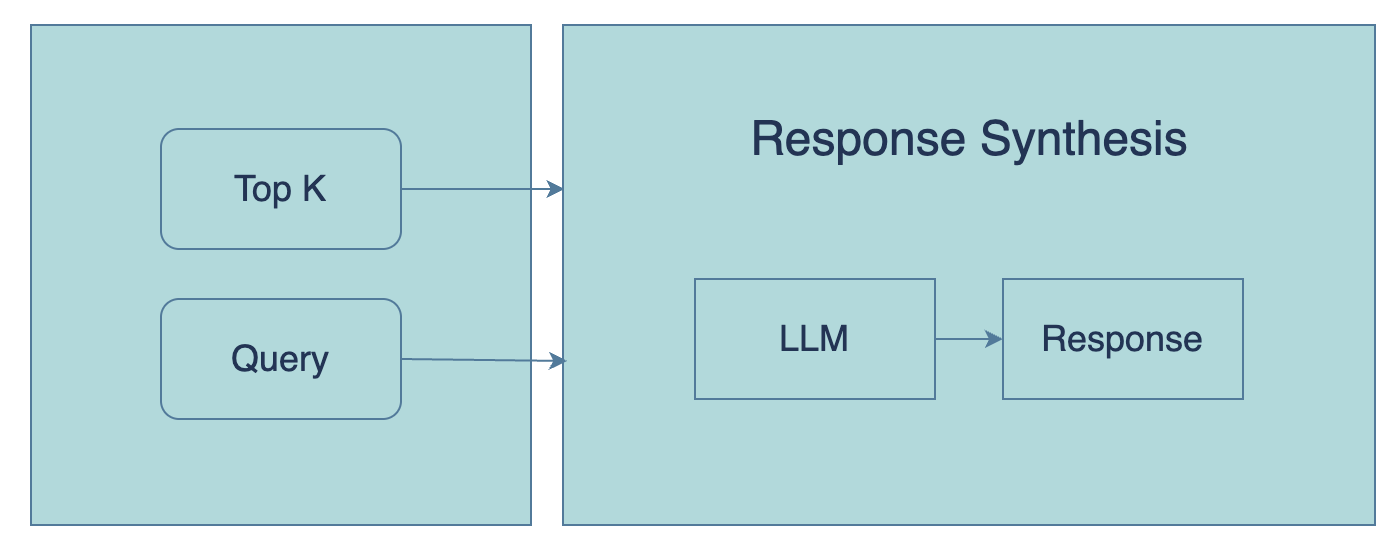

In [ ]:
import os


In [ ]:
!mkdir data
!wget 'https://arxiv.org/pdf/1706.03762.pdf' -O 'data/transformers.pdf'

--2025-03-24 01:18:54--  https://arxiv.org/pdf/1706.03762.pdf
Resolving arxiv.org (arxiv.org)... 151.101.195.42, 151.101.3.42, 151.101.131.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.195.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/1706.03762 [following]
--2025-03-24 01:18:55--  http://arxiv.org/pdf/1706.03762
Connecting to arxiv.org (arxiv.org)|151.101.195.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘data/transformers.pdf’

data/transformers.p 100%[===================>]   2.11M  --.-KB/s    in 0.07s   

2025-03-24 01:18:55 (30.3 MB/s) - ‘data/transformers.pdf’ saved [2215244/2215244]



In [ ]:
from pathlib import Path
from llama_index.readers.file import PDFReader

In [ ]:
loader = PDFReader()

In [ ]:
documents = loader.load_data(file=Path('/content/data/transformers.pdf'))

In [ ]:
from llama_index.core import VectorStoreIndex

In [ ]:
index = VectorStoreIndex.from_documents(documents=documents)

In [ ]:
# retriever

retriever = index.as_retriever()


### Refine  

The **Refine** method incrementally improves the response by processing retrieved data in a step-by-step manner. It starts with an initial draft answer and continuously refines it as more information is processed. This method is useful when responses need **deep contextual understanding**.  

*  **Use case:** When you need a **detailed, context-rich answer** by iteratively refining retrieved data.  



In [ ]:
from llama_index.core import get_response_synthesizer

In [ ]:
response_synthesizer = get_response_synthesizer(
                                  response_mode="refine"
                              )

###  Compact  

The **Compact** method optimizes responses by **summarizing retrieved content** before passing it to the LLM. This is particularly useful when working with **large documents** or when token limits are a constraint.  

 **Use case:** When dealing with **long documents** and needing a concise, summarized response.  


In [ ]:
response_synthesizer = get_response_synthesizer(
                                  response_mode="compact"
                              )

### Tree Summarize  

The **Tree Summarize** method organizes retrieved data into a **hierarchical structure** before generating a final response. It is particularly effective for handling large datasets, ensuring that key points are **structured logically** before being synthesized into an answer.  

* **Use case:** When you need **well-structured, hierarchical summarization** of large data sources.  


In [ ]:
response_synthesizer = get_response_synthesizer(
                                  response_mode="tree_summarize"
                              )

### Accumulate  

The **Accumulate** mode simply **aggregates all retrieved information** and presents it as a response without any additional summarization or refinement. This is useful when you want to provide **raw information** and let the user interpret the data themselves.  

*   **Use case:** When you want to **return all retrieved content** without modification.  



In [ ]:
response_synthesizer = get_response_synthesizer(
                                  response_mode="accumulate"
                              )

### Compact Accumulate  

The **Compact Accumulate** mode is a combination of **Compact** and **Accumulate**—it reduces the size of retrieved data but still retains all relevant information. This balances **efficiency** and **completeness**, ensuring that responses are **concise yet informative**.  

* **Use case:** When you need **compressed but complete responses** from retrieved documents.  


In [ ]:
response_synthesizer = get_response_synthesizer(
                                  response_mode="compact_accumulate"
                              )

Now that we’ve learned how LlamaIndex **synthesizes responses** from retrieved data, let’s move on to the final step—**Query Engine**. This is where everything comes together to allow users to interact with their data efficiently.

Let’s dive into **Query Engine** next!  

## Query Engine

The Query Engine takes user input, retrieves relevant data using the **Retriever**, synthesizes a response using the **Response Synthesizer**, and returns the final answer. It is highly customizable and can be tailored based on retrieval strategy, response mode, and LLM integration.  


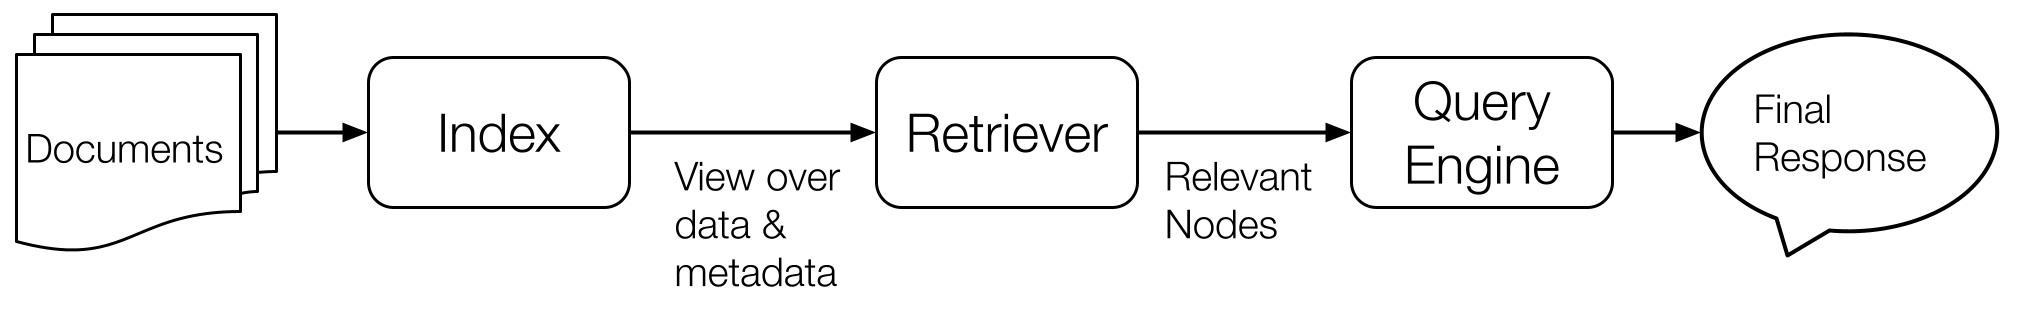

[Source](https://llama-index.readthedocs.io/zh/stable/_images/query_classes.png)

### How the Query Engine Works  
The Query Engine follows a **structured pipeline**:  

1. **User Query**: The user asks a question or submits a prompt.  
2. **Retriever**: Relevant documents or data chunks are retrieved from the index.  
3. **Response Synthesis**: The retrieved data is processed using one of the synthesis methods (**Refine, Compact, etc.**) to generate a structured response.  
4. **Final Response**: The processed answer is returned to the user.  

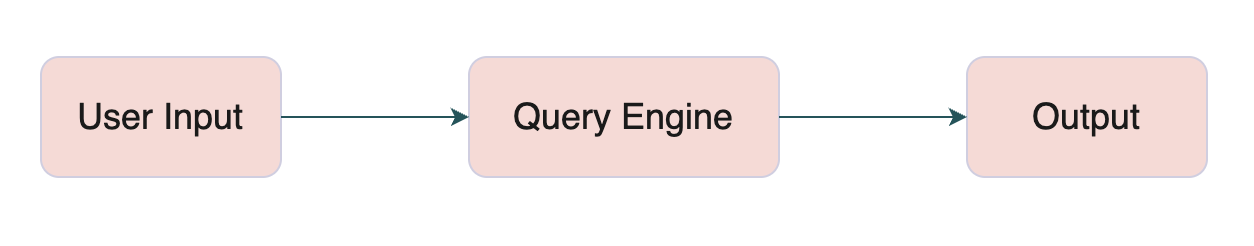

<!-- ![qe](https://i.imgur.com/doAxxzI.png) -->


### Customizing the Query Engine  
LlamaIndex provides flexibility in how queries are processed. You can:  

- **Modify Retrieval Strategies**: Choose between **semantic search, keyword search, or hybrid search**.  
- **Adjust Response Modes**: Use **compact summarization, refinement, or accumulation** based on the use case.  
- **Integrate with Different LLMs**: Use OpenAI, Hugging Face models, or other local LLMs for response generation.  
- **Enable Multi-Stage Querying**: Implement **step-by-step reasoning** over complex datasets.  

In [ ]:
query_engine = index.as_query_engine(response_synthesizer=response_synthesizer)

In [ ]:
response = query_engine.query(
    "give me list of names of layers in transformer architecture"
)

In [ ]:
print(response)

Response 1: The names of the layers in the Transformer architecture are:
1. Multi-head self-attention mechanism
2. Position-wise fully connected feed-forward network


## Chat Engine

In [ ]:
chat_engine = index.as_chat_engine(response_synthesizer=response_synthesizer)

In [ ]:
response = chat_engine.chat(
    "what is multi-head attention?"
)

In [ ]:
print(response)

Multi-head attention involves linearly projecting queries, keys, and values multiple times with different learned linear projections to different dimensions before performing the attention function in parallel. This allows the model to jointly attend to information from different representation subspaces at different positions, enhancing its ability to capture complex relationships in the data.


In [ ]:
response = chat_engine.chat(
    "summerize it in one line"
)

In [ ]:
print(response)

Multi-head attention involves parallel processing of queries, keys, and values with multiple learned linear projections to capture complex relationships in data.


With the Query Engine, we bring together all the components of LlamaIndex into a fully functional system. It allows users to interact with structured and unstructured data seamlessly, making it a powerful tool for RAG applications, chatbots, and AI-powered search.

That’s a wrap! Now, you have a complete understanding of LlamaIndex and how it enables efficient data retrieval and processing. Feel free to experiment and build amazing AI applications!